# TIME SERIES ANALYSIS

### 1. Objective <a name = "Objective"></a>
- Build a model to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.

### 2. Data Loading and Visualization <a name = "Data Loading and Visualization"></a>

__Import the dataset and libraries__ 

In [1]:
import numpy as np 
import pandas as pd 

import warnings; warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# import seaborn as sns
# import pylab
from pylab import rcParams

# plt.rcParams['figure.figsize'] = 18,8
# pd.set_option('display.max_columns', None)


# from sklearn.metrics import mean_squared_error


# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import pmdarima as pm



In [2]:
# for dirname, _, filenames in os.walk(r'C:\Users\Administrator\Desktop\All\Impact_Analytics\store-sales-time-series-forecasting\Data'):
#     for filename in filenames:
#         print(filename)

In [2]:
path = r"C:\Users\Administrator\Desktop\All\Impact_Analytics\store-sales-time-series-forecasting\Data"
train = pd.read_csv(path + "\\train.csv")
test = pd.read_csv(path + "\\test.csv")
oil = pd.read_csv(path + "\\oil.csv")
stores = pd.read_csv(path + "\\stores.csv")
# transactions = pd.read_csv(path + "\\transactions.csv")
holidays_events = pd.read_csv(path + "\\holidays_events.csv")

In [4]:
train.shape

(3000888, 6)

In [3]:
dimDate = pd.DataFrame({"date" : pd.date_range('2013-01-01', '2017-08-31')} ) ## a check for missing date values in valrious dfs

In [5]:
train.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [6]:
test.head(10)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
5,3000893,2017-08-16,1,BREAD/BAKERY,12
6,3000894,2017-08-16,1,CELEBRATION,0
7,3000895,2017-08-16,1,CLEANING,25
8,3000896,2017-08-16,1,DAIRY,45
9,3000897,2017-08-16,1,DELI,18


In [7]:
transactions.head(1)

,date,store_nbr,transactions
0,2013-01-01,25,770


In [8]:
holidays_events.head(1)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False


In [9]:
holidays_events.type.value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [10]:
train.date.max(), train.date.min(), test.date.max()

('2017-08-15', '2013-01-01', '2017-08-31')

In [11]:
holidays_events.date.max(), holidays_events.date.min()

('2017-12-26', '2012-03-02')

In [4]:
holidays_events.rename(columns = {'type':'holiday_type'},inplace = True)

In [13]:
holidays_events.isnull().sum()

date            0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

In [14]:
stores.head(1)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13


In [15]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [16]:
stores.type.value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [5]:
stores.rename(columns = {'type':'store_type'},inplace = True)

In [6]:
def func_datetime(df):
    df['date'] = pd.to_datetime(df['date'])
    return df
oil = func_datetime(oil)
holidays_events = func_datetime(holidays_events)
train = func_datetime(train)
test = func_datetime(test)
# transactions = func_datetime(transactions)

In [7]:
oil = dimDate.merge(oil,on = 'date',how = 'left')

In [20]:
oil.head(21)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,NaN
5,2013-01-06,NaN
6,2013-01-07,93.20
7,2013-01-08,93.21
8,2013-01-09,93.08
9,2013-01-10,93.81


In [21]:
oil.isnull().sum()

date            0
dcoilwtico    529
dtype: int64

In [22]:
train.date.max(), train.date.min(), test.date.max()

(Timestamp('2017-08-15 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2017-08-31 00:00:00'))

In [23]:
oil.date.max(), oil.date.min()

(Timestamp('2017-08-31 00:00:00'), Timestamp('2013-01-01 00:00:00'))

In [24]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

__Can use forward or backward fill method to replace missing values__

In [8]:
oil["dcoilwtico"] = oil.dcoilwtico.interpolate() # avg of bfill and ffill for all rows except for first
oil["dcoilwtico"] = oil.dcoilwtico.fillna(method ='bfill') # bfill for first row

In [26]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [27]:
holidays_events.date.max(),holidays_events.date.min()

(Timestamp('2017-12-26 00:00:00'), Timestamp('2012-03-02 00:00:00'))

In [28]:
holidays_events.sort_values('date',inplace=True)

In [29]:
holidays_events.head()

,date,holiday_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [9]:
calendar = dimDate.merge(holidays_events, on = 'date', how='left')
calendar.head(3)

,date,holiday_type,locale,locale_name,description,transferred
0,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-02,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,NaN,NaN,NaN,NaN,NaN


In [31]:
calendar.transferred.value_counts()

False    278
True       9
Name: transferred, dtype: int64

In [32]:
calendar.holiday_type.value_counts()

Holiday       176
Event          56
Additional     38
Transfer        9
Work Day        5
Bridge          3
Name: holiday_type, dtype: int64

In [33]:
## transferred alrady covered in holiday_type... so dropping it

In [10]:
calendar.drop('transferred',inplace = True,axis = 1)

In [35]:
calendar.locale.value_counts()

National    151
Local       118
Regional     18
Name: locale, dtype: int64

In [36]:
calendar.locale_name.value_counts()

Ecuador                           151
Guayaquil                          11
Riobamba                           10
Ambato                              9
Guaranda                            9
Latacunga                           9
Quito                               8
Cuenca                              6
Manta                               5
Esmeraldas                          5
Cayambe                             5
Santo Domingo                       5
El Carmen                           5
Machala                             5
Imbabura                            5
Puyo                                5
Libertad                            5
Cotopaxi                            5
Ibarra                              4
Quevedo                             4
Santo Domingo de los Tsachilas      4
Santa Elena                         4
Loja                                4
Salinas                             4
Name: locale_name, dtype: int64

In [11]:
calendar.fillna("Others",inplace = True)

In [38]:
calendar.isnull().sum()

date            0
holiday_type    0
locale          0
locale_name     0
description     0
dtype: int64

In [39]:
transactions.date.max(), transactions.date.min() # we cant use transactions data as we dont have its values for test data dates..

(Timestamp('2017-08-15 00:00:00'), Timestamp('2013-01-01 00:00:00'))

In [12]:
def merge(df):
    df1 = df.merge(calendar, on = 'date', how='left')
    df1 = df1.merge(oil, on = 'date', how='left')
    df1 = df1.merge(stores, on = 'store_nbr', how='left')
    return df1

In [15]:
df_train = merge(train)
df_test = merge(test)

In [42]:
df_test.isnull().sum()

id              0
date            0
store_nbr       0
family          0
onpromotion     0
holiday_type    0
locale          0
locale_name     0
description     0
dcoilwtico      0
city            0
state           0
store_type      0
cluster         0
dtype: int64

In [43]:
df_train.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
holiday_type    0
locale          0
locale_name     0
description     0
dcoilwtico      0
city            0
state           0
store_type      0
cluster         0
dtype: int64

Our dataset is finally ready.. we can now start with feature engineering.. lets create new features

In [16]:
def features(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['week'] = df['date'].dt.isocalendar().week
    df['quarter'] = df['date'].dt.quarter
    df['day_of_week'] = df['date'].dt.day_name()
    return df

In [17]:
df_train = features(df_train)
df_test = features(df_test)

In [46]:
df_train.tail(2)

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,dcoilwtico,city,state,store_type,cluster,year,month,week,quarter,day_of_week
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.0,8,Holiday,Local,Riobamba,Fundacion de Riobamba,47.57,Quito,Pichincha,B,6,2017,8,33,3,Tuesday
3054347,3000887,2017-08-15,9,SEAFOOD,16.0,0,Holiday,Local,Riobamba,Fundacion de Riobamba,47.57,Quito,Pichincha,B,6,2017,8,33,3,Tuesday


In [47]:
df_train.shape, df_test.shape

((3054348, 20), (28512, 19))

In [19]:
df = df_train.copy()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 20 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  dcoilwtico    float64       
 11  city          object        
 12  state         object        
 13  store_type    object        
 14  cluster       int64         
 15  year          int64         
 16  month         int64         
 17  week          UInt32        
 18  quarter       int64         
 19  day_of_week   object        
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(7), object(9)
memory usage: 480.6+ MB


In [50]:
df.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,cluster,year,month,week,quarter
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,6.782500e+01,8.481481e+00,2.014842e+03,6.222870e+00,2.530863e+01,2.413652e+00
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,2.568059e+01,4.649735e+00,1.345607e+00,3.374251e+00,1.475051e+01,1.095690e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.636667e+01,4.000000e+00,2.014000e+03,3.000000e+00,1.300000e+01,1.000000e+00
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.329167e+01,8.500000e+00,2.015000e+03,6.000000e+00,2.500000e+01,2.000000e+00
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,9.573000e+01,1.300000e+01,2.016000e+03,9.000000e+00,3.800000e+01,3.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01,2.017000e+03,1.200000e+01,5.300000e+01,4.000000e+00


In [20]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")
df_test['date'] = pd.to_datetime(df_test['date'], format="%m/%d/%Y")

In [52]:
print(f'training data from {df.date.min()} to {df.date.max()} and test data from {df_test.date.min()} to {df_test.date.max()}')

training data from 2013-01-01 00:00:00 to 2017-08-15 00:00:00 and test data from 2017-08-16 00:00:00 to 2017-08-31 00:00:00


__Historical data of around 4.5yrs and test data of next 15 days__

In [23]:
df['date'] = df['date'].dt.floor('d')

<AxesSubplot:>

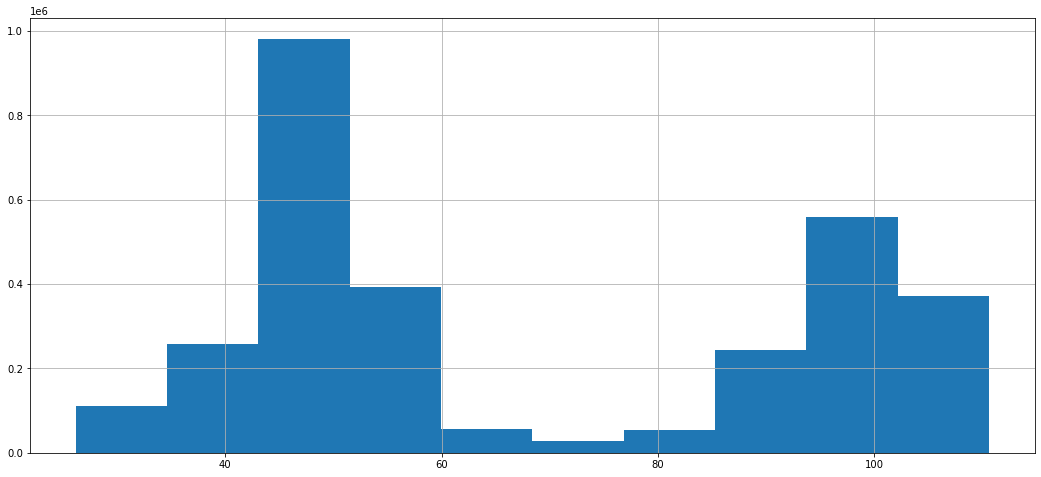

In [54]:
df.dcoilwtico.hist()

In [21]:
df["dcoilwtico_cat"] = pd.cut(df["dcoilwtico"],
                               bins=[0, 40, 50, 60, 90,100, np.inf],
                               labels=[1, 2, 3, 4, 5,6])
df_test["dcoilwtico_cat"] = pd.cut(df_test["dcoilwtico"],
                               bins=[0, 40, 50, 60, 90,100, np.inf],
                               labels=[1, 2, 3, 4, 5,6])

In [56]:
df["dcoilwtico_cat"].value_counts()

2    987228
5    661122
3    507870
6    479358
1    247698
4    171072
Name: dcoilwtico_cat, dtype: int64

In [57]:
# def formatting(df):
#     df.date = df.date.dt.to_period('D')
#     df = df.set_index(['store_nbr', 'family', 'date']).sort_index()
#     return df

In [22]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['family', 'holiday_type', 'locale', 'locale_name', 'description', 'city', 'state', 'store_type', 'day_of_week']


In [59]:
df.day_of_week.value_counts()/len(df)

Sunday       0.144691
Thursday     0.143524
Tuesday      0.142940
Saturday     0.142940
Wednesday    0.142357
Friday       0.141774
Monday       0.141774
Name: day_of_week, dtype: float64

In [60]:
df.locale_name.value_counts()/len(df)

Others                            0.835473
Ecuador                           0.085764
Guayaquil                         0.006418
Riobamba                          0.005834
Guaranda                          0.005251
Latacunga                         0.005251
Quito                             0.004667
Ambato                            0.004667
Cuenca                            0.003501
Esmeraldas                        0.002917
Cayambe                           0.002917
Santo Domingo                     0.002917
El Carmen                         0.002917
Machala                           0.002917
Imbabura                          0.002917
Puyo                              0.002917
Libertad                          0.002917
Cotopaxi                          0.002917
Manta                             0.002917
Ibarra                            0.002334
Quevedo                           0.002334
Santo Domingo de los Tsachilas    0.002334
Santa Elena                       0.002334
Loja       

In [61]:
# def masking(df):
#     df['locale_name']= df['locale_name'].mask(df['locale_name'].map(df['locale_name'].value_counts(normalize=True)) < 0.003, 'Other')
#     df['city']= df['city'].mask(df['city'].map(df['city'].value_counts(normalize=True)) < 0.03, 'Other')
#     df['state']= df['state'].mask(df['state'].map(df['state'].value_counts(normalize=True)) < 0.03, 'Other')
#     return df

In [23]:
def masking2(df,df1):
    df.loc[~df["locale_name"].isin(df1.locale_name.value_counts()[:6].index.tolist()), "locale_name"] = "Other"
    df.loc[~df["city"].isin(df1.locale_name.value_counts()[:6].index.tolist()), "city"] = "Other"
    df.loc[~df["state"].isin(df1.locale_name.value_counts()[:6].index.tolist()), "state"] = "Other"
    return df

In [24]:
df = masking2(df,df)
df_test = masking2(df_test,df)

In [64]:
df.locale_name.value_counts()/len(df)

Others       0.835473
Ecuador      0.085764
Other        0.056009
Guayaquil    0.006418
Riobamba     0.005834
Guaranda     0.005251
Latacunga    0.005251
Name: locale_name, dtype: float64

In [65]:
df.city.value_counts()/len(df)

Other        0.814815
Guayaquil    0.148148
Riobamba     0.018519
Guaranda     0.018519
Name: city, dtype: float64

In [66]:
df.locale.value_counts()/len(df)

Others      0.835473
National    0.085764
Local       0.068261
Regional    0.010502
Name: locale, dtype: float64

In [67]:
df.state.value_counts()/len(df)

Other    1.0
Name: state, dtype: float64

In [25]:
df_test.drop('description',inplace = True,axis = 1)
# too many categories
df.drop('description',inplace = True,axis = 1)
object_cols.remove('description')

__Splitting the dataset into 2 parts__ 

Taking data upto April in training set and April to Mid Aug in evaluation set. (Approx 10%)

In [26]:
training_df = df[df.date<"2017-04-01"]
eval_df = df[df.date>="2017-04-01"]
training_df.shape, eval_df.shape,df.shape, eval_df.shape[0]*100/training_df.shape[0]

((2803086, 20), (251262, 20), (3054348, 20), 8.963763509218055)

__We are doing this step now because later on we are going to do feature engineering. .. prior to this step we havent done any step which can do data leakage__

In [70]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'holiday_type', 'locale', 'locale_name', 'dcoilwtico', 'city', 'state',
       'store_type', 'cluster', 'year', 'month', 'week', 'quarter',
       'day_of_week', 'dcoilwtico_cat'],
      dtype='object')

In [71]:
df_test.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'holiday_type',
       'locale', 'locale_name', 'dcoilwtico', 'city', 'state', 'store_type',
       'cluster', 'year', 'month', 'week', 'quarter', 'day_of_week',
       'dcoilwtico_cat'],
      dtype='object')

In [72]:
object_cols

['family',
 'holiday_type',
 'locale',
 'locale_name',
 'city',
 'state',
 'store_type',
 'day_of_week']

In [73]:
df.shape

(3054348, 20)

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(training_df[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(eval_df[object_cols]))


In [28]:
# One-hot encoding removed index; put it back
OH_cols_train.index = training_df.index
OH_cols_valid.index = eval_df.index

In [29]:

# Remove categorical columns (will replace with one-hot encoding)
num_train = training_df.drop(object_cols, axis=1)
num_valid = eval_df.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_train = pd.concat([num_train, OH_cols_train], axis=1)
OH_valid = pd.concat([num_valid, OH_cols_valid], axis=1)

In [30]:
OH_cols_test = pd.DataFrame(OH_encoder.transform(df_test[object_cols]))
OH_cols_test.index = df_test.index
num_test = eval_df.drop(object_cols, axis=1)
OH_test = pd.concat([num_test, OH_cols_test], axis=1)

In [71]:
OH_train.shape, OH_valid.shape, OH_test.shape

((2803086, 80), (251262, 80), (279774, 80))

In [32]:
# del num_test,OH_cols_test, num_train, num_valid, OH_cols_train, OH_cols_valid, train, test, oil, calendar, holidays_events, stores, dimDate

NameError: name 'num_test' is not defined

In [79]:
# df = formatting(df)
# df_test = formatting(df_test)

In [81]:
df.head(2)

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,dcoilwtico,city,state,store_type,cluster,year,month,week,quarter,day_of_week,dcoilwtico_cat
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,93.14,Quito,Pichincha,D,13,2013,1,1,1,Tuesday,5
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,93.14,Quito,Pichincha,D,13,2013,1,1,1,Tuesday,5


__MISSING VALUE CHECK__

In [72]:
df.isna().sum()*100/len(df) # Percent of null values

id                0.0
date              0.0
store_nbr         0.0
family            0.0
sales             0.0
onpromotion       0.0
holiday_type      0.0
locale            0.0
locale_name       0.0
dcoilwtico        0.0
city              0.0
state             0.0
store_type        0.0
cluster           0.0
year              0.0
month             0.0
week              0.0
quarter           0.0
day_of_week       0.0
dcoilwtico_cat    0.0
dtype: float64

In [81]:
df.head(2)

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,dcoilwtico,city,state,store_type,cluster,year,month,week,quarter,day_of_week,dcoilwtico_cat
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,93.14,Other,Other,D,13,2013,1,1,1,Tuesday,5
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,93.14,Other,Other,D,13,2013,1,1,1,Tuesday,5


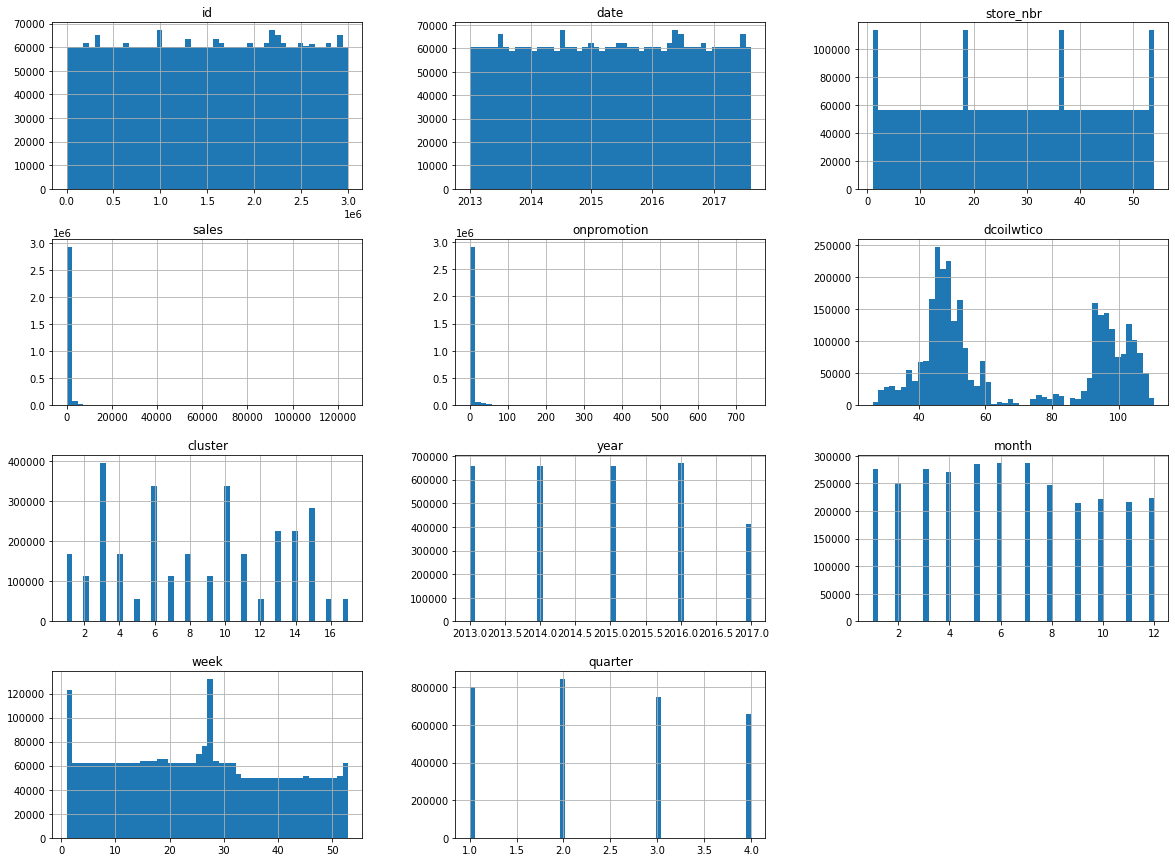

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

__X and y__

In [33]:
OH_train.shape, OH_valid.shape, OH_test.shape

((2803086, 80), (251262, 80), (279774, 80))

In [34]:
OH_train.set_index('date',inplace = True)
OH_test.set_index('date',inplace = True)
OH_valid.set_index('date',inplace = True)

In [35]:
y_train = OH_train.sales
X_train = OH_train.drop(['sales'], axis=1)

y_test = OH_test.sales
X_test = OH_test.drop(['sales'], axis=1)

y_valid = OH_valid.sales
X_valid = OH_valid.drop(['sales'], axis=1)

__LINEAR REGRESSION__

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# lin_reg.intercept_, lin_reg.coef_ # Was taking too long

In [46]:
def wape(y_true, y_pred): 
    return np.abs(y_true-y_pred).sum() / y_true.sum()
 

In [39]:
y_pred_lin_reg = lin_reg.predict(X_valid)

In [40]:
WAPE_lin_reg = wape(np.array(y_valid),y_pred_lin_reg)
WAPE_lin_reg

0.660849834736829

In [41]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train, y_train)


Ridge(alpha=1, random_state=42, solver='cholesky')

In [42]:
y_pred_ridge_reg = lin_reg.predict(X_valid)

In [43]:
WAPE_ridge = wape(np.array(y_valid),y_pred_ridge_reg)
WAPE_ridge

0.660849834736829

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net = elastic_net.fit(X_train, y_train)
y_pred_enet = elastic_net.predict(X_valid)
WAPE_enet = wape(np.array(y_valid),y_pred_enet)
WAPE_enet

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_valid)
WAPE_lasso = wape(np.array(y_valid),y_pred_lasso)
WAPE_lasso

In [38]:
s = (X_train.dtypes == 'object')
object_cols_X_train = list(s[s].index)

print("Categorical variables:")
print(object_cols_X_train)

Categorical variables:
[]


In [39]:
X_train.head(3)

,id,store_nbr,onpromotion,dcoilwtico,cluster,year,month,week,quarter,dcoilwtico_cat,...,58,59,60,61,62,63,64,65,66,67
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,0,93.14,13,2013,1,1,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,1,1,0,93.14,13,2013,1,1,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,2,1,0,93.14,13,2013,1,1,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
X_train.dtypes[:10]

id                   int64
store_nbr            int64
onpromotion          int64
dcoilwtico         float64
cluster              int64
year                 int64
month                int64
week                UInt32
quarter              int64
dcoilwtico_cat    category
dtype: object

In [44]:
X_train.dcoilwtico_cat = X_train.dcoilwtico_cat.astype('int')
X_train.week = X_train.week.astype('int')
X_valid.dcoilwtico_cat = X_valid.dcoilwtico_cat.astype('int')
X_valid.week = X_valid.week.astype('int')

In [ ]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_valid)
wape_pred_xgb = wape(np.array(y_valid),y_pred_xgb)

In [47]:
wape_pred_xgb

0.2731942278339088

In [49]:
xgb_reg.fit(X_train, y_train,
                eval_set=[(X_valid, y_valid)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_valid)
y_pred_xgb = xgb_reg.predict(X_valid)
wape_pred_xgb = wape(np.array(y_valid),y_pred_xgb)
print("Validation WAPE:", wape_pred_xgb)

[0]	validation_0-rmse:1126.03809
[1]	validation_0-rmse:907.39740
[2]	validation_0-rmse:767.17847
[3]	validation_0-rmse:659.49298
[4]	validation_0-rmse:604.39874
[5]	validation_0-rmse:560.24676
[6]	validation_0-rmse:528.27167
[7]	validation_0-rmse:497.31165
[8]	validation_0-rmse:484.86453
[9]	validation_0-rmse:475.84732
[10]	validation_0-rmse:464.84436
[11]	validation_0-rmse:451.04953
[12]	validation_0-rmse:445.04883
[13]	validation_0-rmse:437.73343
[14]	validation_0-rmse:431.61020
[15]	validation_0-rmse:428.50858
[16]	validation_0-rmse:427.85010
[17]	validation_0-rmse:425.92007
[18]	validation_0-rmse:419.50702
[19]	validation_0-rmse:417.79962
[20]	validation_0-rmse:417.10187
[21]	validation_0-rmse:415.10333
[22]	validation_0-rmse:413.84970
[23]	validation_0-rmse:410.92023
[24]	validation_0-rmse:407.16589
[25]	validation_0-rmse:405.89175
[26]	validation_0-rmse:403.45697
[27]	validation_0-rmse:402.20074
[28]	validation_0-rmse:401.96759
[29]	validation_0-rmse:402.18942
[30]	validation_0-r

__Can ignore the below analysis.. its not complete__

__Visualizing the dataset__

In [143]:
df['date'] = pd.to_datetime(df['date'])

For Store 1 of family AUTOMOTIVE

In [144]:
df1 = df[(df.store_nbr == 1 )& (df.family == "AUTOMOTIVE")][["date","sales"]].set_index('date').resample('M').mean()

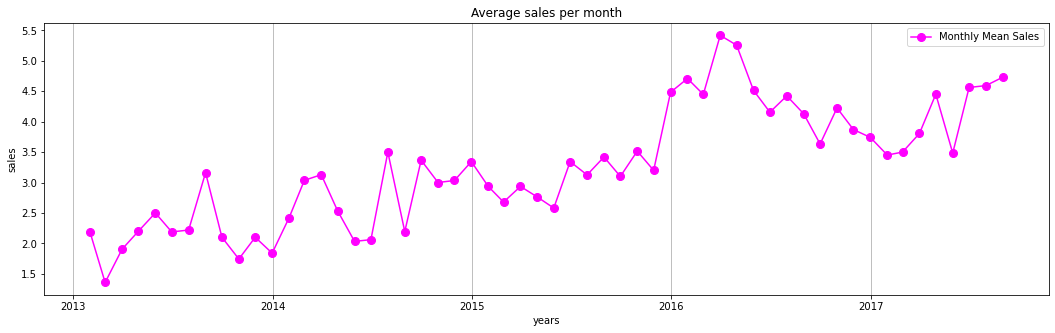

In [145]:
y = df1['sales']
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(y,marker='o', markersize=8, linestyle='-', label='Monthly Mean Sales', color='fuchsia')
ax.set_ylabel('sales')
ax.set_title('Average sales per month')
ax.set_xlabel('years')
ax.grid(axis='x')
ax.legend();

From the plot below, we can see that there is a __Trend compoenent__ in the series.<br/> Now for better clarity lets decompose the time series in its constituent components. 

### Decomposition <a name = "Decomposition"></a>

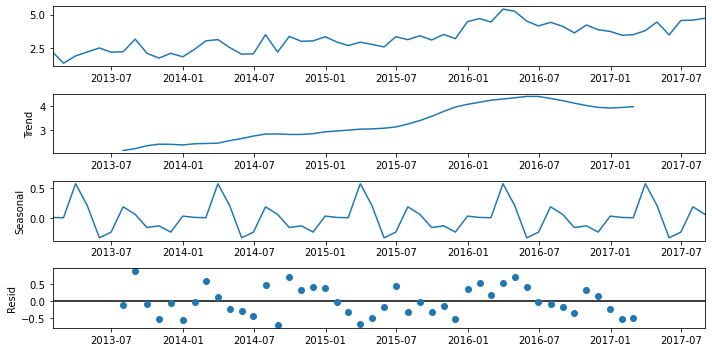

In [146]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']  =  10, 5

from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_dataset  =  seasonal_decompose(df1)         
figure  =  decomposed_dataset.plot()
plt.show()

### Stationarity Check <a name = "Stationarity Check"></a>

We will see two methods two check stationarity. 

Making a function to check stationarity in one go using both __rolling statistics plot and ADF test__.

In [81]:
def test_stationarity(time_series):
    rolling_means(time_series)
    adf_test(time_series)

#### Rolling Statistics Methodology <a name = "Rolling Statistics Methodology"></a>

In [147]:
# Determine rolling statistics
def rolling_means(time_series):
    rolmean  =  time_series.rolling(window = 12).mean()    #window size 12 denotes 12 months, giving rolling mean at yearly level
    rolstd  =  time_series.rolling(window = 12).std()

    #Plot rolling statistics

    rcParams['figure.figsize']  =  10, 5 

    orig  =  plt.plot(time_series, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

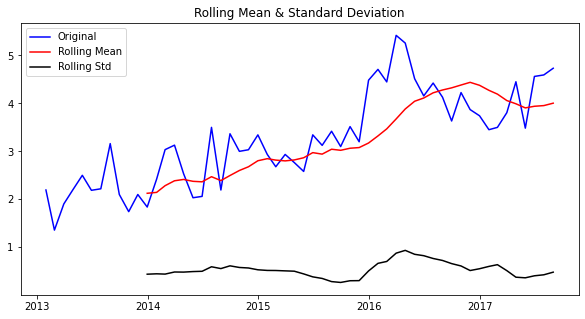

In [148]:
rolling_means(df1)

- Rolling mean has a __trend__ component 
- Rolling standard deviation is approx. __constant__ with time.

For our time series to be stationary, we need to ensure that both the __rolling statistics__ i.e: __mean & stdandard deviation remain time invariant__ or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so. 

To further augment our hypothesis that the time series is not stationary, let us perform the __ADCF test__.

####  ADF(Augmented Dickey-Fuller) Test <a name = "ADF"></a>

For a Time series to be __stationary__, its ADF test should have:
1. __low p-value__ (according to the null hypothesis)
2. __Critical values__ at 1%, 5%, 10% confidence intervals should be as __close__ as possible __to__ the __Test Statistics__

In [153]:
#Perform Augmented Dickey–Fuller test:
def adf_test(time_series):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(time_series['sales'], autolag = 'AIC')

    dfoutput  =  pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [154]:
adf_test(df1)

Results of Dickey Fuller Test:
Test Statistic                 -1.682590
p-value                         0.440104
#Lags Used                      1.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


- __medium p-value__.
- Also critical values (1%, 5%, 10%) are __not too far__ from the Test Statistics.

Hence, we can say that **our Time Series at the moment can be made more stationary**

### Data Transformation to achieve Stationarity <a name = "Data Transformation to achieve Stationarity"></a>

#### Log Scale Transformation  <a name = "Log Scale Transformation"></a>

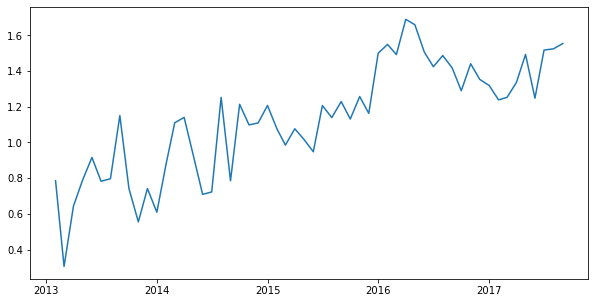

In [155]:
import numpy as np
indexedDataset_logScale  =  np.log(df1)
rcParams['figure.figsize']  =  10, 5
plt.plot(indexedDataset_logScale)

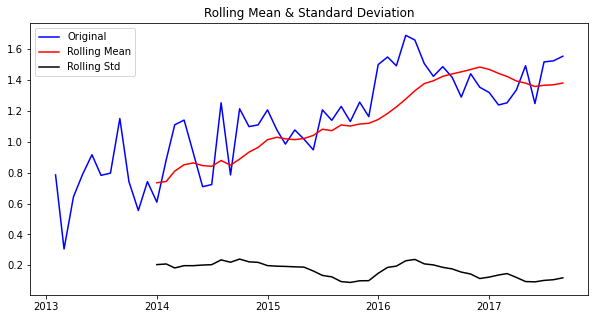

Results of Dickey Fuller Test:
Test Statistic                 -2.240299
p-value                         0.191946
#Lags Used                      1.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [156]:
test_stationarity(indexedDataset_logScale)

Still not stationary

From above graph, we see that even though rolling mean is __not stationary__, it is still better than the previous case

#### 5.2 Log Scale - Moving Average Transformation  <a name = "Log Scale - Moving Average Transformation"></a>

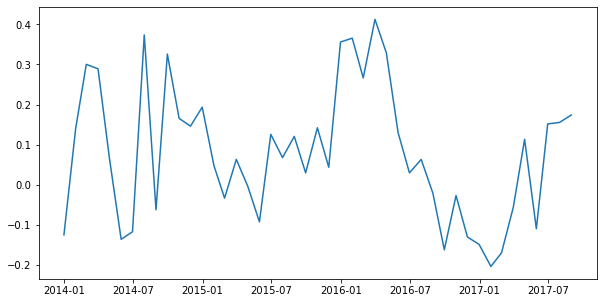

In [157]:
movingAverage  =  indexedDataset_logScale.rolling(window = 12).mean()
datasetLogScaleMinusMovingAverage  =  indexedDataset_logScale - movingAverage
plt.plot(datasetLogScaleMinusMovingAverage)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace = True)


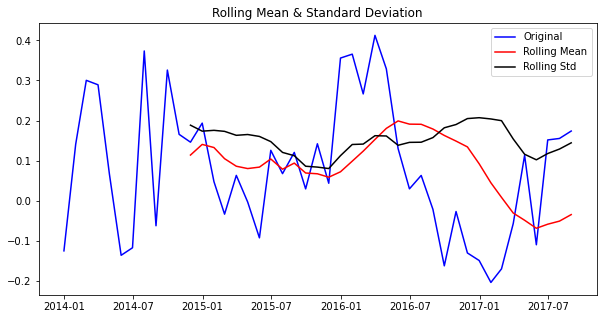

Results of Dickey Fuller Test:
Test Statistic                 -2.289191
p-value                         0.175478
#Lags Used                      4.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In [158]:
test_stationarity(datasetLogScaleMinusMovingAverage)

- p-value has __reduced__ from 0.44 to 0.17.  
- The __critical values__ at 1%,5%,10% confidence intervals are pretty __close to the Test Statistic__.

Thus, from above 2 points, we can say that our given series is stationary.  

From above graph, we observe that our intuition that *"subtracting two related series having similar trend components will make the result stationary"* is true.   



But, let us explore & try to find a better scale than our current log.  

### Exponential Decay Transformation   <a name = "Exponential Decay Transformation "></a>

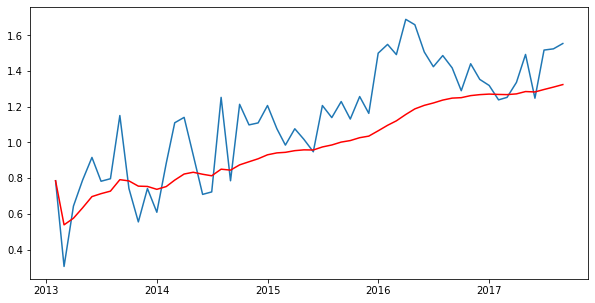

In [159]:
exponentialDecayWeightedAverage  =  indexedDataset_logScale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

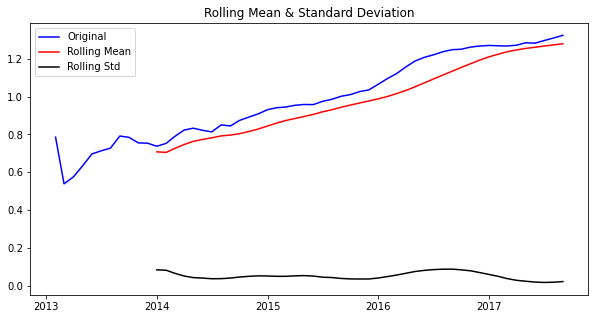

Results of Dickey Fuller Test:
Test Statistic                 -2.059511
p-value                         0.261104
#Lags Used                      1.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [161]:
test_stationarity(exponentialDecayWeightedAverage)

rather worsened from the previously acheived

From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are similar.

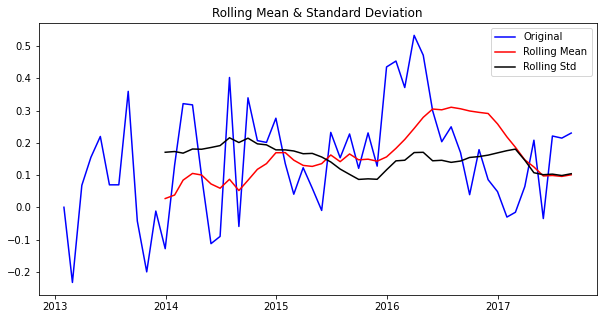

Results of Dickey Fuller Test:
Test Statistic                 -4.787975
p-value                         0.000057
#Lags Used                      0.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


In [162]:
datasetLogScaleMinusExponentialMovingAverage  =  indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

We observe that the Time Series is stationary & also the series for moving avg & std. dev. is almost parallel to x-axis thus they also have no trend.  
Also,     
1. p-value has __decreased__ from 0.17 to 0.00005.  
2. Test Statistic value have deviated abit from the Critical values.  

Seems our current transformation is better than the previous logarithmic transformation.

## The End